In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/XXXX/Documents/IP/KM/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

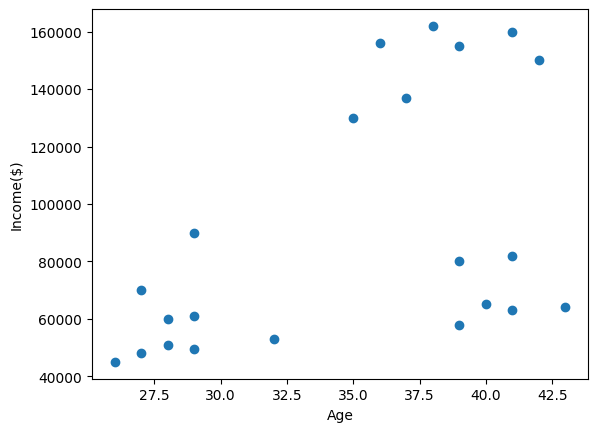

In [10]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [11]:
km=KMeans(n_clusters=3)

In [15]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [17]:
df['cluster']=y_predicted

In [18]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [19]:
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

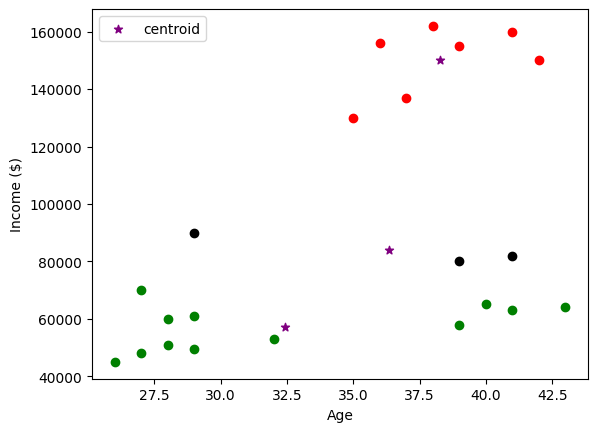

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()


In [28]:
sc=MinMaxScaler()

In [31]:
df.dtypes

Name          object
Age          float64
Income($)      int64
cluster        int32
dtype: object

In [33]:
sc.fit(df[['Age']])
df['Age']=sc.transform(df[['Age']])
sc.fit(df[['Income($)']])
df['income']=sc.transform(df[['Income($)']])

In [34]:
df

,Name,Age,Income($),cluster,income
0,Rob,0.058824,70000,0,0.213675
1,Michael,0.176471,90000,2,0.384615
2,Mohan,0.176471,61000,0,0.136752
3,Ismail,0.117647,60000,0,0.128205
4,Kory,0.941176,150000,1,0.897436
5,Gautam,0.764706,155000,1,0.940171
6,David,0.882353,160000,1,0.982906
7,Andrea,0.705882,162000,1,1.000000
8,Brad,0.588235,156000,1,0.948718
9,Angelina,0.529412,130000,1,0.726496


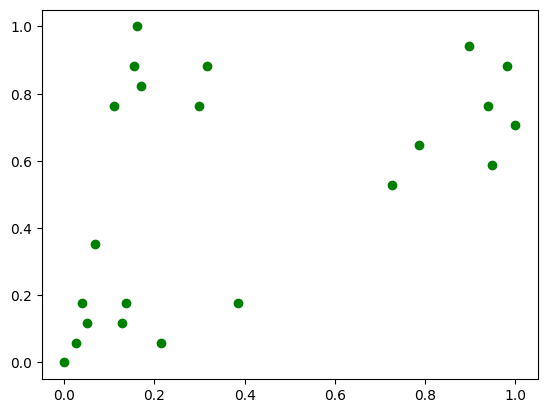

In [36]:
plt.scatter(df.income,df.Age,color='green')
plt.show()

In [38]:
km = KMeans(n_clusters=3)
y_predited=km.fit_predict(df[['Age','income']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [42]:
df['cluster']=y_predicted

In [43]:
df.head()

,Name,Age,Income($),cluster,income
0,Rob,0.058824,70000,0,0.213675
1,Michael,0.176471,90000,2,0.384615
2,Mohan,0.176471,61000,0,0.136752
3,Ismail,0.117647,60000,0,0.128205
4,Kory,0.941176,150000,1,0.897436


In [45]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428]])

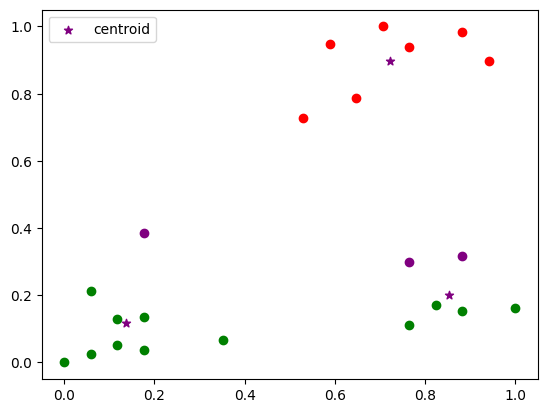

In [47]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Age'],df1['income'],color='green')
plt.scatter(df2['Age'],df2['income'],color='red')
plt.scatter(df3['Age'],df3['income'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

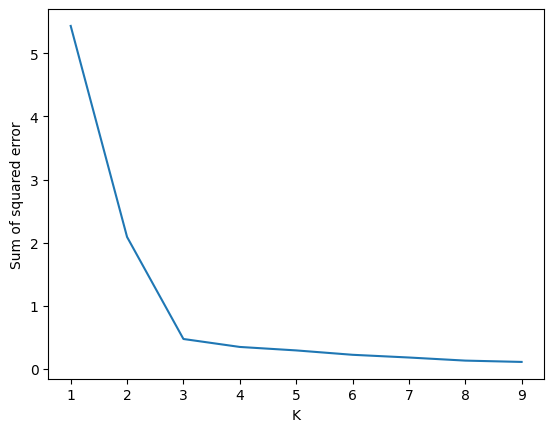

In [50]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','income']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)